# ‘WeRateDogs’推特数据分析
### 收集-评估-清洗-可视化分析
## 1   收集

In [1]:
# 导入需要的库
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

1. 收集手头文件 `twitter_archive_enhanced.csv`，其中包含了一些主要的推特信息，是本次清洗的主要数据，其中的评分、地位和名字等数据是从 `text` 原文中提取的，但是提取的并不好，评分并不都是正确的，狗的名字和地位也有不正确的 。如果你想用评分、地位和名字进行分析和可视化，需要评估和清洗这些列。完成这些列的评估和清洗，你可以学到更加实用的技能。
2. `image-predictions.tsv`，其中包含了推特图像预测信息，根据推特中的图片预测出狗狗种类；
3. 额外推特信息 `tweet_json.txt`，至少需要提取转发数（`retweet_count`）和喜欢数（`favorite_count`）这两列。

In [2]:
# 收集文件 1 保存为 dataframe
df1_twitter=pd.read_csv('p2_ly/data/twitter-archive-enhanced.csv')
# 收集文件 2 保存为 dataframe
df2_pred=pd.read_csv('p2_ly/data/image-predictions.tsv',sep='\t')
# 收集文件 3 保存为 dataframe
with open('p2_ly/data/tweet_json.txt','r') as file3:
    tweet_data=json.load(file3)
df3_added=pd.DataFrame(tweet_data)

## 2   评估
### 目测评估

In [3]:
# 目测评估三个数据集

In [4]:
df1_twitter.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [5]:
df2_pred.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [6]:
df3_added.head(3)

,created_at,favorite_count,favorited,retweet_count,retweeted,tweet_id
0,Tue Aug 01 16:23:56 +0000 2017,38074,False,8328,False,892420643555336193
1,Tue Aug 01 00:17:27 +0000 2017,32681,False,6151,False,892177421306343426
2,Mon Jul 31 00:18:03 +0000 2017,24592,False,4070,False,891815181378084864


<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

### 编程评估

In [7]:
# 使用 pandas 的各种方法评估三个数据集，比如 info、value_counts 等
df1_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
df1_twitter.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1338,705066031337840642,NaN,NaN,2016-03-02 16:23:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Reese. He's a Chilean Sohcahtoa. Loves...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705066031...,12,10,Reese,None,None,None,None
1929,674042553264685056,NaN,NaN,2015-12-08 01:47:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yea I can't handle the cuteness anymore. Curls...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674042553...,12,10,None,None,None,None,None
1311,707021089608753152,NaN,NaN,2016-03-08 01:52:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's a Dasani Episcopalian. Go...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707021089...,12,10,Tucker,None,None,None,None
1842,675870721063669760,6.757073e+17,4.196984e+09,2015-12-13 02:51:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",&amp; this is Yoshi. Another world record cont...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675870721...,11,10,None,None,None,None,None
559,803276597545603072,NaN,NaN,2016-11-28 16:37:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winston. His selfie game is legendary....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803276597...,11,10,Winston,None,None,None,None


In [9]:
# 根据expanded_urls检查tweets是否有重复值（网址应该是唯一的）
df1_twitter['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/782305867769217024/photo/1,https://twitter.com/dog_rates/status/782305867769217024/photo/1,https://twitter.com/dog_rates/status/782305867769217024/photo/1                                                                    2
https://twitter.com/dog_rates/status/673295268553605120/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/739238157791694849/video/1                                                                                                                                                                                                    2
https://www.loveyourmelon.com/pages/ourstory,https://twitter.com/dog_rates/status/820314633777061888/photo/1,https://twitter.com/dog_rates/status/820314633777061888/photo/1,https://twitter.com/dog_rates/status/8203146

In [10]:
df2_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
df2_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1699,816829038950027264,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,1,dishwasher,0.700466,False,golden_retriever,0.245773,True,chow,0.039012,True
415,674014384960745472,https://pbs.twimg.com/media/CVqUgTIUAAUA8Jr.jpg,1,Pembroke,0.742320,True,Cardigan,0.084937,True,Eskimo_dog,0.068321,True
1307,753420520834629632,https://pbs.twimg.com/ext_tw_video_thumb/75342...,1,balloon,0.267961,False,lakeside,0.085764,False,rapeseed,0.040809,False
186,669363888236994561,https://pbs.twimg.com/media/CUoO1TLWsAA0Z3w.jpg,1,golden_retriever,0.539004,True,Irish_setter,0.406550,True,cocker_spaniel,0.041484,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False


In [12]:
df3_added.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 6 columns):
created_at        2339 non-null object
favorite_count    2339 non-null int64
favorited         2339 non-null bool
retweet_count     2339 non-null int64
retweeted         2339 non-null bool
tweet_id          2339 non-null int64
dtypes: bool(2), int64(3), object(1)
memory usage: 77.7+ KB


In [13]:
df3_added.sample(5)

,created_at,favorite_count,favorited,retweet_count,retweeted,tweet_id
1568,Wed Jan 13 02:17:20 +0000 2016,2358,False,648,False,687096057537363968
1100,Wed May 18 00:14:46 +0000 2016,3695,False,944,False,732726085725589504
1397,Sun Feb 14 16:33:40 +0000 2016,2657,False,663,False,698907974262222848
716,Sat Oct 01 00:58:26 +0000 2016,0,False,6835,False,782021823840026624
706,Wed Oct 05 00:40:09 +0000 2016,9036,False,2466,False,783466772167098368


###   评估结果
#### a  质量
##### `df1_twitter` 表格
- tweet_id数据类型应该是字符串型
- timestamp数据类型应该是datetime, timestamp列‘+0000’多余
- expanded_urls有重复值
- in_reply_to_status_id等列缺失数据
- name列中存在一些不规范的记录，如a,an,the

##### `df2_pred` 表格
- p1,p2,p3的数据类型应为category

##### `df3_added` 表格
- created_at列的数据类型应为datetime, 要与df1_twitter中timestamp格式一致
- 只需要tweet_id,retweet_count,favorite_count数据，其余为多余的

#### b  整洁度
- df1_twitter表格中，狗狗的不同地位 (stage): doggo, pupper, puppo, 和 floof(er) 应作为一个变量
- timestamp中日期和时间应该分成两列


## 3   清理

In [14]:
# 备份三个数据集
df1_twitter_copy=df1_twitter.copy()
df2_pred_copy=df2_pred.copy()
df3_added_copy=df3_added.copy()

#### 问题描述一
##### 定义
将数据集中的数据改为合适的数据类型，例如tweet_id的数据类型更改为字符串型

In [15]:
# 解决问题一的代码
df1_twitter_copy.tweet_id=df1_twitter_copy.tweet_id.astype(str)
df2_pred_copy.tweet_id=df2_pred_copy.tweet_id.astype(str)
df3_added_copy.tweet_id=df3_added_copy.tweet_id.astype(str)
df1_twitter_copy.timestamp=pd.to_datetime(df1_twitter_copy.timestamp)

##### 测试

In [16]:
# 测试问题一是否正确清理完成
df1_twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64

#### 问题描述二
##### 定义
将df1_twitter的 name列中不规范的记录，a,an,the替换成None

In [17]:
# 解决问题二的代码
df1_twitter_copy.name=df1_twitter_copy.name.replace(['a','an','the'],'None')

##### 测试

In [18]:
# 测试问题二是否正确清理完成
df1_twitter_copy['name'].value_counts()

None          815
Charlie        12
Lucy           11
Oliver         11
Cooper         11
Tucker         10
Penny          10
Lola           10
Winston         9
Bo              9
Sadie           8
Toby            7
Daisy           7
Bailey          7
Buddy           7
Bella           6
Leo             6
Rusty           6
Milo            6
Jack            6
Jax             6
Dave            6
Oscar           6
Stanley         6
Koda            6
Scout           6
Bentley         5
Oakley          5
Larry           5
Gus             5
             ... 
Livvie          1
Major           1
Kirk            1
Zeus            1
Mimosa          1
Pete            1
Teddy           1
Tom             1
Kobe            1
Tuco            1
Binky           1
Pip             1
Chevy           1
Laika           1
Milky           1
Dot             1
Creg            1
Obie            1
Derby           1
Colin           1
Lucia           1
Rontu           1
Stefan          1
his             1
Alf       

#### 问题描述三
##### 定义
在df1_twitter数据集中，从timestamp列分别提取出日期和时间，再删除timestamp列

In [19]:
# 解决问题三的代码
df1_twitter_copy['date']=pd.DatetimeIndex(df1_twitter_copy.timestamp).date
df1_twitter_copy['time']=pd.DatetimeIndex(df1_twitter_copy.timestamp).time
df1_twitter_copy=df1_twitter_copy.drop(columns='timestamp')

##### 测试

In [20]:
# 测试问题三是否正确清理完成
df1_twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
date                          2356 non-null object
time                          2

#### 问题描述四
##### 定义
在df1_twitter数据集中，删除重复的expanded_urls数据

In [21]:
# 解决问题四的代码
df1_twitter_copy=df1_twitter_copy.drop_duplicates(subset='expanded_urls',keep='first')

##### 测试

In [22]:
# 测试问题四是否正确清理完成
df1_twitter_copy[df1_twitter_copy.expanded_urls.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time


#### 问题描述五
##### 定义
在df1_twitter数据集中，删除缺失数据过多的列
in_reply_to_status_id, 
in_reply_to_user_id,
retweeted_status_id,
retweeted_status_user_id, 
retweeted_status_timestamp

In [23]:
# 解决问题五的代码
# df1_twitter_copy=df1_twitter.copy()
df1_twitter_copy=df1_twitter_copy.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])

##### 测试

In [24]:
# 测试问题五是否正确清理完成
df1_twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2219 non-null object
source                2219 non-null object
text                  2219 non-null object
expanded_urls         2218 non-null object
rating_numerator      2219 non-null int64
rating_denominator    2219 non-null int64
name                  2219 non-null object
doggo                 2219 non-null object
floofer               2219 non-null object
pupper                2219 non-null object
puppo                 2219 non-null object
date                  2219 non-null object
time                  2219 non-null object
dtypes: int64(2), object(11)
memory usage: 242.7+ KB


#### 问题描述六
##### 定义
将df2_pred表格中p1,p2,p3的数据类型更改为category

In [25]:
# 解决问题六的代码
df2_pred_copy.p1=df2_pred_copy.p1.astype('category')
df2_pred_copy.p2=df2_pred_copy.p2.astype('category')
df2_pred_copy.p3=df2_pred_copy.p3.astype('category')

##### 测试

In [26]:
# 测试问题六是否正确清理完成
df2_pred_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(1), object(2)
memory usage: 174.9+ KB


#### 问题描述七
##### 定义
将df3_added表格created_at列的数据类型更改为datetime

In [27]:
# 解决问题七的代码
df3_added_copy.created_at=pd.to_datetime(df3_added_copy.created_at)

##### 测试

In [28]:
# 测试问题七是否正确清理完成
df3_added_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 6 columns):
created_at        2339 non-null datetime64[ns, UTC]
favorite_count    2339 non-null int64
favorited         2339 non-null bool
retweet_count     2339 non-null int64
retweeted         2339 non-null bool
tweet_id          2339 non-null object
dtypes: bool(2), datetime64[ns, UTC](1), int64(2), object(1)
memory usage: 77.7+ KB


#### 问题描述八
##### 定义
在df3_added表格中,保留tweet_id,retweet_count,favorite_count列，删除多余的数据

In [29]:
# 解决问题八的代码
df3_added_copy=df3_added_copy[['tweet_id','retweet_count','favorite_count']]

##### 测试

In [30]:
# 测试问题八是否正确清理完成
df3_added_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id          2339 non-null object
retweet_count     2339 non-null int64
favorite_count    2339 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


#### 问题描述九
##### 定义
df1_twitter表格中，存在未记录doggo, pupper, puppo, 和 floof(er)以及重复记录的数据

In [31]:
# 解决问题九的代码
df1_twitter_copy['doggo'] = df1_twitter_copy['doggo'].replace('None', 0)
df1_twitter_copy['doggo'] = df1_twitter_copy['doggo'].replace('doggo', 1)
df1_twitter_copy['pupper'] = df1_twitter_copy['pupper'].replace('None', 0)
df1_twitter_copy['pupper'] = df1_twitter_copy['pupper'].replace('pupper', 1)
df1_twitter_copy['puppo'] = df1_twitter_copy['puppo'].replace('None', 0)
df1_twitter_copy['puppo'] = df1_twitter_copy['puppo'].replace('puppo', 1)
df1_twitter_copy['floofer'] = df1_twitter_copy['floofer'].replace('None', 0)
df1_twitter_copy['floofer'] = df1_twitter_copy['floofer'].replace('floofer', 1)

#删除有多个结果的数据
df1_twitter_copy=df1_twitter_copy[~(df1_twitter_copy['doggo']+df1_twitter_copy['pupper']+df1_twitter_copy['puppo']+df1_twitter_copy['floofer']>1)]

#筛选出未记录的数据
df1_twitter_copy['None']=0
df1_twitter_copy.loc[(df1_twitter_copy['doggo']+df1_twitter_copy['pupper']+df1_twitter_copy['puppo']+df1_twitter_copy['floofer']==0),'None']=1


##### 测试

In [32]:
# 测试问题九是否正确清理完成
df1_twitter_copy['None'].value_counts()

1    1863
0     342
Name: None, dtype: int64

#### 问题描述十
##### 定义
在df1_twitter表格中，将doggo, pupper, puppo, 和 floof(er) 四列合并为一个变量stage

In [33]:
# 解决问题十的代码
df1_twitter_copy=pd.melt(df1_twitter_copy,id_vars=['tweet_id','source','text','expanded_urls','rating_numerator','rating_denominator','name','date','time'],var_name='stage',value_name='record')

##### 测试

In [34]:
# 测试问题十是否正确清理完成
df1_twitter_copy=df1_twitter_copy[df1_twitter_copy['record']==1]
df1_twitter_copy=df1_twitter_copy.drop(columns='record')
df1_twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 9 to 11024
Data columns (total 10 columns):
tweet_id              2205 non-null object
source                2205 non-null object
text                  2205 non-null object
expanded_urls         2204 non-null object
rating_numerator      2205 non-null int64
rating_denominator    2205 non-null int64
name                  2205 non-null object
date                  2205 non-null object
time                  2205 non-null object
stage                 2205 non-null object
dtypes: int64(2), object(8)
memory usage: 189.5+ KB


### 存储清理后的主数据集

In [35]:
#将清洗后的三个数据集合并成一个主数据集
df_main=pd.merge(df1_twitter_copy,df2_pred_copy,on='tweet_id',how='inner')
df_main=pd.merge(df_main,df3_added_copy,on='tweet_id',how='inner')
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 23 columns):
tweet_id              1976 non-null object
source                1976 non-null object
text                  1976 non-null object
expanded_urls         1976 non-null object
rating_numerator      1976 non-null int64
rating_denominator    1976 non-null int64
name                  1976 non-null object
date                  1976 non-null object
time                  1976 non-null object
stage                 1976 non-null object
jpg_url               1976 non-null object
img_num               1976 non-null int64
p1                    1976 non-null category
p1_conf               1976 non-null float64
p1_dog                1976 non-null bool
p2                    1976 non-null category
p2_conf               1976 non-null float64
p2_dog                1976 non-null bool
p3                    1976 non-null category
p3_conf               1976 non-null float64
p3_dog                1976 non-

In [36]:
df_main.sample(5)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
191,686683045143953408,"<a href=""http://twitter.com/download/iphone"" r...",This is Mona. She's a Yarborough Splishnsplash...,https://twitter.com/dog_rates/status/686683045...,11,10,Mona,2016-01-11,22:56:10,pupper,...,0.100499,True,cocker_spaniel,0.080671,True,golden_retriever,0.079406,True,858,2949
60,724771698126512129,"<a href=""http://twitter.com/download/iphone"" r...",Nothin better than a doggo and a sunset. 11/10...,https://twitter.com/dog_rates/status/724771698...,11,10,None,2016-04-26,01:26:53,doggo,...,0.835491,True,bluetick,0.058788,True,English_setter,0.037208,True,682,2475
1488,676897532954456065,"<a href=""http://twitter.com/download/iphone"" r...",Exotic handheld dog here. Appears unathletic. ...,https://twitter.com/dog_rates/status/676897532...,5,10,None,2015-12-15,22:52:02,None,...,0.628255,False,guinea_pig,0.318646,False,macaque,0.013058,False,763,2344
40,786363235746385920,"<a href=""http://twitter.com/download/iphone"" r...",This is Rizzo. He has many talents. A true ren...,https://twitter.com/dog_rates/status/786363235...,13,10,Rizzo,2016-10-13,00:29:39,doggo,...,0.929266,True,Labrador_retriever,0.062867,True,Saluki,0.002157,True,3844,11683
1551,674788554665512960,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Maggie. She's a Western Septic Do...,https://twitter.com/dog_rates/status/674788554...,9,10,Maggie,2015-12-10,03:11:43,None,...,0.349561,True,toy_poodle,0.154711,True,Maltese_dog,0.134229,True,218,835


In [37]:
#将主数据集存储为csv文件
df_main.to_csv('p2_ly/data/twitter_archive_master.csv',index=False)

## 4   可视化分析

Text(0.5, 1.0, 'Top10 popular dog types')

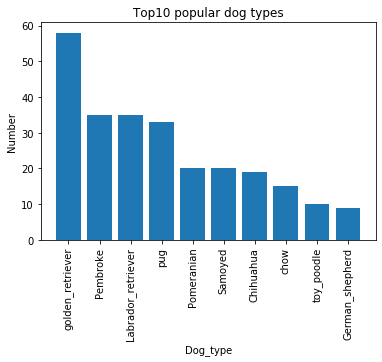

In [38]:
#1 大家最喜欢的狗的品种

# 筛选出第一类预测结果是dog 且可信度 >80%的数据
types_dog=df_main[(df_main.p1_dog==True)&(df_main.p1_conf>0.8)].p1.value_counts()
plt.bar(types_dog[0:10].index,types_dog[0:10])
plt.xticks(rotation='vertical')
plt.xlabel('Dog_type')
plt.ylabel('Number')
plt.title('Top10 popular dog types')

#### 结论1：最受大家喜爱的狗前三名分别是金毛，柯基和拉布拉多

Text(0.5, 1.0, 'Top10 popular dog names')

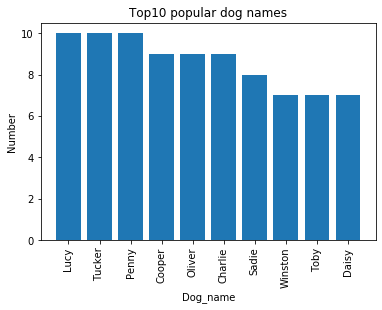

In [39]:
#2 最常用的狗的名字

Name=df_main.name.value_counts()
plt.bar(Name[1:11].index,Name[1:11])
plt.xticks(rotation='vertical')
plt.xlabel('Dog_name')
plt.ylabel('Number')
plt.title('Top10 popular dog names')

#### 结论2：最常用的名字前三是Lucy，Penny和Tucker

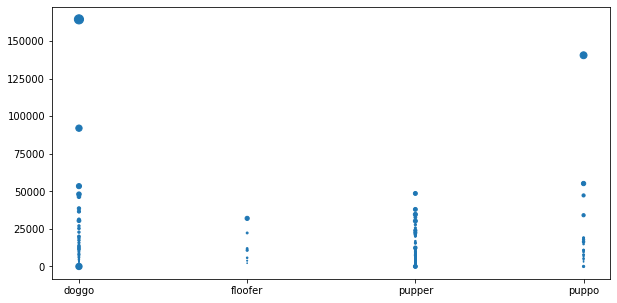

In [40]:
#3 大狗和小狗的受欢迎程度

df_part=df_main[df_main['stage']!='None']
plt.figure(figsize=(10,5))
plt.scatter(df_part['stage'],df_part['favorite_count'],s=df_part['retweet_count']/1000)

#### 结论3：从转发数及点赞数来看，大狗doggo更受欢迎